## Review the Basics

- Input Neurons : Number of features used by a neural network to make predictions
- Hidden Layers : Application of weightings to inputs to provide desired outputs
- Output Neurons : Predictions the neural network makes

Using numbers to predict another number

Example : Does the size, # of bathrooms / bedrooms, etc. effect the value of a house? Based on those variables can we make predictions about the price?

In Machine Learning algorithms are trained to understand relationships between features and make predictions about labels

## What is a Tensor?

Numerical representation of non-numerical data. Pink has no meaning as input, but .1 Red, .075 Green, and .079 Blue does if represented as [.1, .075, .079]

## How do we Improve Predicitions / Models?

- Fit on more data
- Increase hidden units : Add weightings to get desired output
- Try different activation functions : Helps decide what data is most important
- Try different optimization functions : Optimize by smoothing data to expected results
- Increase learning rate : How much to change the model based on estimated error
- Fit longer : Increase the number of times we try to fit the data

## Binary & Multi-class Classification

## Tensorflow Binary Classification

Binary classification refers to something being one thing or another.

| Hyperparameter | Binary Classification |
| :---: | :---: |
| Input Layer | Shape == number of features |
| Hidden Layers | Minimum of 1 to Unlimited |
| Neurons in Hidden Layer | Normally 10 to 100 |
| Output layer | 1 |
| Hidden activation | Usually Rectified Linear Unit (ReLU) |
| Output activation | Sigmoid |
| Loss function | BinaryCrossentropy |
| Optimizer | Stochastic Gradient Descent, Adam |

## Imports

In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Used to build and deploy machine learning apps
import tensorflow as tf

# Deep Learning API for creating Neural Networks (Runs on TensorFlow)
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow import math
from keras.utils.vis_utils import plot_model

# Scikit-learn : machine learning library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## Get Wine Data

Location https://www.kaggle.com/datasets/shelvigarg/wine-quality-dataset?select=winequalityN.csv

In [5]:
wine_data = pd.read_csv("https://raw.githubusercontent.com/derekbanas/tensorflow/main/winequalityN.csv")
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Delete Rows with Unknowns

In [6]:
# Check for nans in columns
wine_data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
# This deletes all of them
wine_data = wine_data.dropna()
wine_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Rename Column

In [8]:
wine_data.rename(columns={"type": "white_wine"},
                inplace=True)
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Change white_wine Based on condition

In [9]:
wine_data.loc[wine_data["white_wine"] == "white", "white_wine"] = 1
wine_data.loc[wine_data["white_wine"] == "red", "white_wine"] = 0
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Change Quality Based on Condition

In [10]:
wine_data.loc[wine_data["quality"] <= 6, "quality"] = 0
wine_data.loc[wine_data["quality"] >= 7, "quality"] = 1
wine_data

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,0
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


## How many Good Wines?

In [11]:
(wine_data['quality'] == 1).sum()

1271

## Normalize Our Data

We will convert our non-numeric data into numbers but all of our data is on different scales. We normalize our data so that it is using a common scale. We can do this while also not distorting the differences in the wide range of values. We will convert all values to between 0 and 1 while preserving the original distribution.

We do this because machine learning algorithms work better when features have a similar scale.

In [12]:
ct = make_column_transformer(
    (MinMaxScaler(), ["fixed acidity", "volatile acidity", "citric acid",
     "residual sugar", "chlorides", "free sulfur dioxide",
     "total sulfur dioxide", "density", "pH", "sulphates",
     "alcohol"]), # Normalize these columns
)

## Separate Features & Labels

In [13]:
X = wine_data.drop("quality", axis=1) # Features
y = wine_data["quality"] # Label
X

,white_wine,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Split into Training & Test

In [14]:
# Get first 80%
len(wine_data) * .80

5170.400000000001

In [15]:
# Build train (80%) & test (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
random_state=66)

## Transform Training & Test Data

In [16]:
# Transform training data 
ct.fit(X_train)

# Transform training and test data with normalization 
# (MinMaxScalar) 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [17]:
X_train_normal

array([[0.21487603, 0.11333333, 0.22289157, ..., 0.34645669, 0.1011236 ,
        0.44927536],
       [0.23966942, 0.12666667, 0.18674699, ..., 0.40944882, 0.19101124,
        0.23188406],
       [0.63636364, 0.15333333, 0.30722892, ..., 0.22834646, 0.3988764 ,
        0.26086957],
       ...,
       [0.27272727, 0.12      , 0.20481928, ..., 0.25984252, 0.1741573 ,
        0.15942029],
       [0.18181818, 0.08      , 0.14457831, ..., 0.4488189 , 0.14044944,
        0.50724638],
       [0.30578512, 0.07333333, 0.20481928, ..., 0.28346457, 0.15168539,
        0.44927536]])

## TensorFlow Playground

Reproduce results from https://playground.tensorflow.org/ using ReLU with code.

- Ratio of Training to Test : 80%
- Learning Rate : 0.001
- Activiation : ReLU
- Regularization : None
- Regularization Rate : 0
- Problem Type : Classification

ReLU, Tanh and Sigmoid are for non-linear data
When analyzing pictures a neural network draws many straight and non-straight lines around objects in images

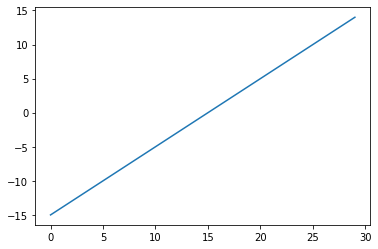

In [22]:
# Create a example tensor with values from -15 to 15
samp_ten = tf.cast(tf.range(-15, 15), tf.float32)
plt.plot(samp_ten)

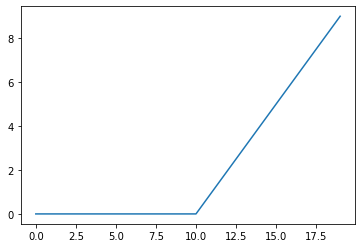

In [20]:
# Turn negative values to zero and other wise leave them as they are
def relu(x):
    return tf.maximum(0, x)

# Pass toy tensor to our relu function
plt.plot(relu(samp_ten))

# When we give our model non-linear functions it's able to find patterns
# in non-linear data (Neural networks use linear and non-linear activations
# to find patterns in data)
# Now we can draw patterns that are curved and bent

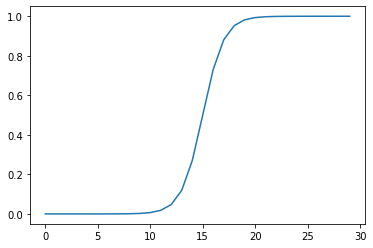

In [23]:
# Replicate sigmoid : sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
# This allows use to draw non-straight lines
plt.plot(sigmoid(samp_ten))

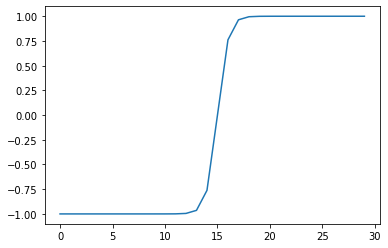

In [24]:
def tanh(x):
    return tf.tanh(x)

# Pass toy tensor to our tanh function
plt.plot(tanh(samp_ten))

## Build Model

In [ ]:
# Set random seed
tf.random.set_seed(66)

# Create a model
# Activation functions help our network decide what is important data.
# They receive data and add weightings to it and pass the results to other hidden layers
# Depending on the error value the weights are updated
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
# Compile the model (Calc errors, optimize and evaluate)
# Loss : Finds the average of the errors between predictions and 
# observed data (How incorrect are our predictions)
# Adam : Optimizes our guesses by smoothing the predictions 
# to the observed data 
# Metrics test the accuracy of the model
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
# Take the data and try to fit the data with 100 tries creating a trained model
# An epoch is a full iteration over the training data
history = model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
162/162 [==============================] - 1s 6ms/step - loss: 0.6386 - accuracy: 0.7749
Epoch 2/100
162/162 [==============================] - 1s 6ms/step - loss: 0.5157 - accuracy: 0.8056
Epoch 3/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4901 - accuracy: 0.8056
Epoch 4/100
162/162 [==============================] - 1s 6ms/step - loss: 0.4839 - accuracy: 0.8056
Epoch 5/100
162/162 [==============================] - 1s 6ms/step - loss: 0.4676 - accuracy: 0.8056
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4435 - accuracy: 0.8056
Epoch 7/100
162/162 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.8056
Epoch 8/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4121 - accuracy: 0.8101
Epoch 9/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4062 - accuracy: 0.8151
Epoch 10/100
162/162 [==============================] - 1s 5ms/step - loss: 0.4028 - accura

- The features passed are converted into a 4 value vector
- That vector is then turned into an additional optimized vector
- Those are converted into a prediction of either good or bad wine

## Evaluate Accuracy of Model

In [ ]:
model_1.evaluate(X_train_normal, y_train)

162/162 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.8248


[0.3763878643512726, 0.8247582316398621]

## How to Improve Model

- Fit on more data
- Increase hidden units : Add weightings to get desired output
- Try different activation functions : Helps decide what data is most important
- Try different optimization functions : Optimize by smoothing data to expected results
- Increase learning rate : How much to change the model based on estimated error
- Fit longer : Increase the number of times we try to fit the data

## Correlation Matrix

<AxesSubplot:>

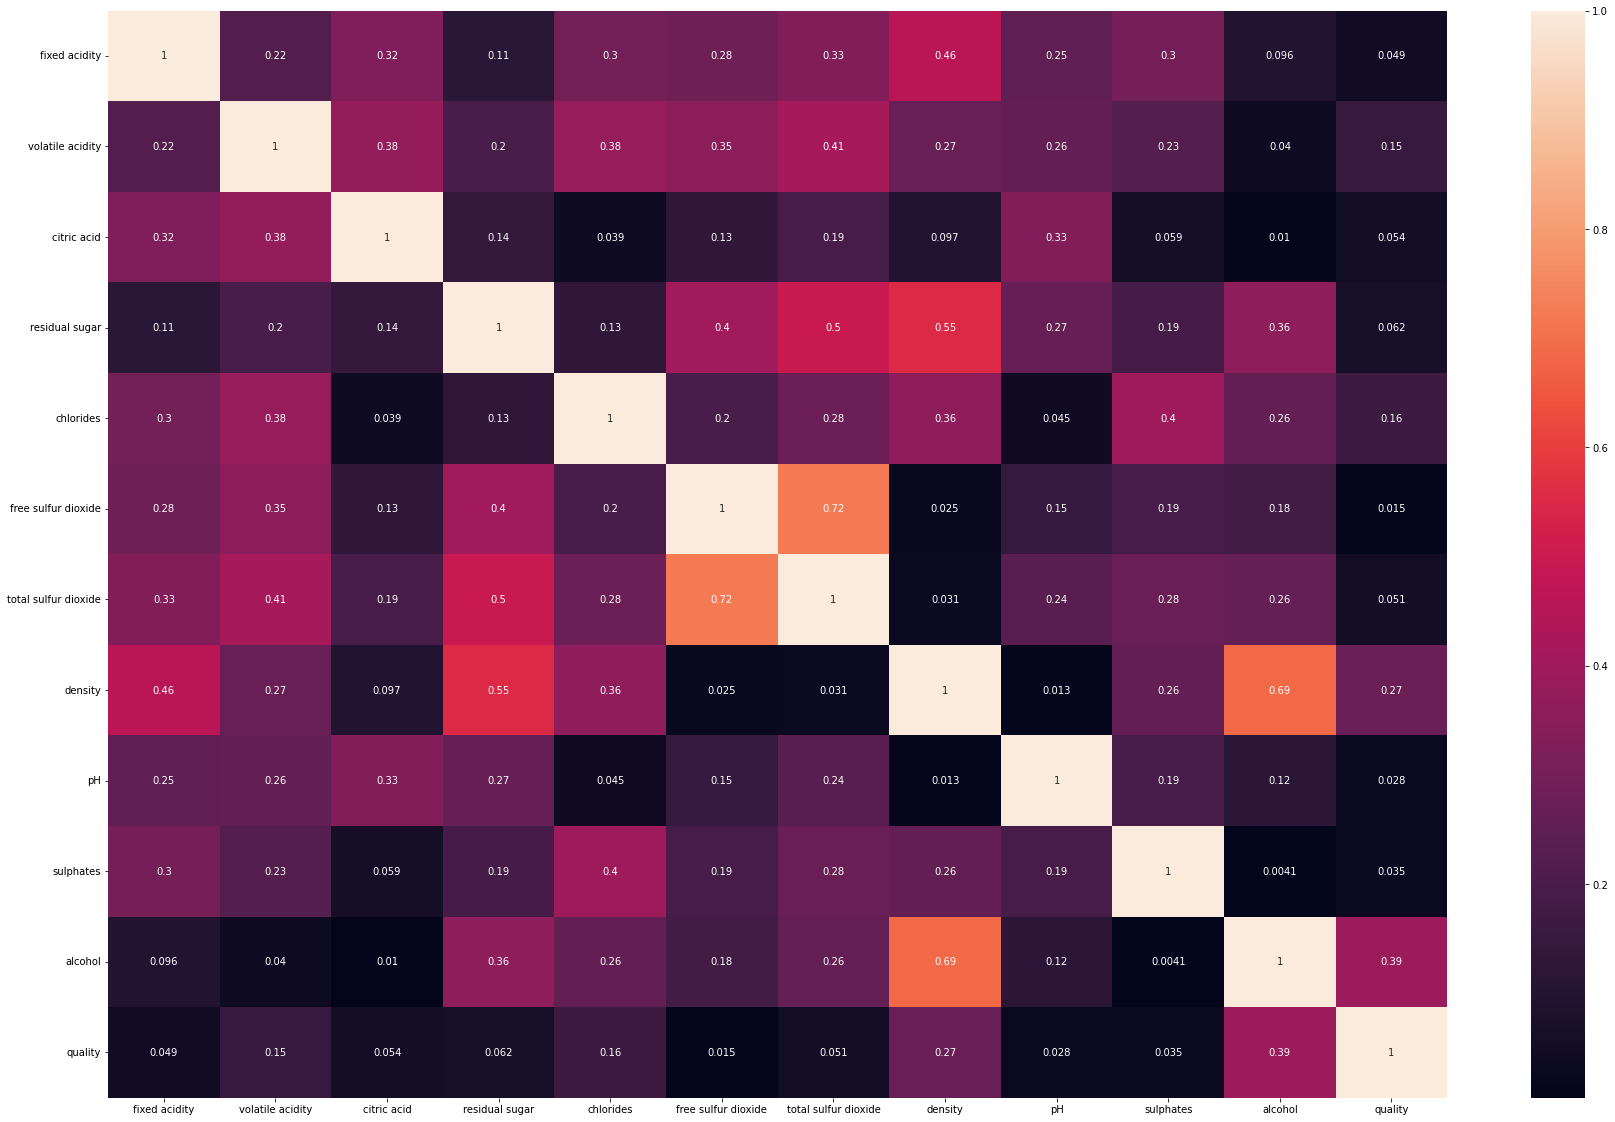

In [ ]:
# When we say data is correlated that means the data is related to each other. When a feature moves in a
# certain direction a label also tends to move in that same direction
plt.figure(figsize=(30, 20))
sns.heatmap(wine_data.corr().abs(),  annot=True)

Correlation matrix shows some correlation between quality and density and alcohol percentage.

## Plot Loss Curve

Text(0.5, 1.0, 'Model 1 Loss Curve')

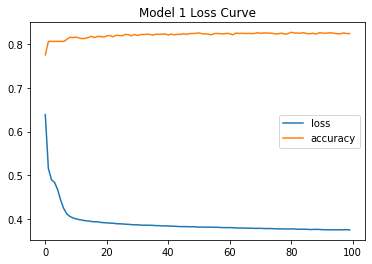

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model 1 Loss Curve")

## Use Callback to Find Ideal Learning Rate

In [ ]:
# Create model to fit on the training data and test on testing data
tf.random.set_seed(66)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
optimizer="Adam",
metrics=["accuracy"])

# The callback works during model training
# At each epoch if we change the learning rate and the 
# schedular is going to give Adam the updated learning rate

# The learning rate starts at 1e-4 (.0001) and after each epoch 
# increase the learning rate 10^(epoch/20)
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_lr = model_2.fit(X_train_normal, y_train, 
epochs=100,
callbacks=[scheduler]) # You can have multiple callbacks

Epoch 1/100
162/162 [==============================] - 1s 6ms/step - loss: 0.6945 - accuracy: 0.4956 - lr: 1.0000e-04
Epoch 2/100
162/162 [==============================] - 1s 6ms/step - loss: 0.6780 - accuracy: 0.7878 - lr: 1.1220e-04
Epoch 3/100
162/162 [==============================] - 1s 6ms/step - loss: 0.6640 - accuracy: 0.8035 - lr: 1.2589e-04
Epoch 4/100
162/162 [==============================] - 1s 6ms/step - loss: 0.6492 - accuracy: 0.8054 - lr: 1.4125e-04
Epoch 5/100
162/162 [==============================] - 1s 5ms/step - loss: 0.6304 - accuracy: 0.8056 - lr: 1.5849e-04
Epoch 6/100
162/162 [==============================] - 1s 5ms/step - loss: 0.6029 - accuracy: 0.8056 - lr: 1.7783e-04
Epoch 7/100
162/162 [==============================] - 1s 6ms/step - loss: 0.5694 - accuracy: 0.8056 - lr: 1.9953e-04
Epoch 8/100
162/162 [==============================] - 1s 6ms/step - loss: 0.5370 - accuracy: 0.8056 - lr: 2.2387e-04
Epoch 9/100
162/162 [==============================] - 1

## Plot Learning Rate Versus the Loss

Text(0.5, 1.0, 'Learning Rate vs. Loss')

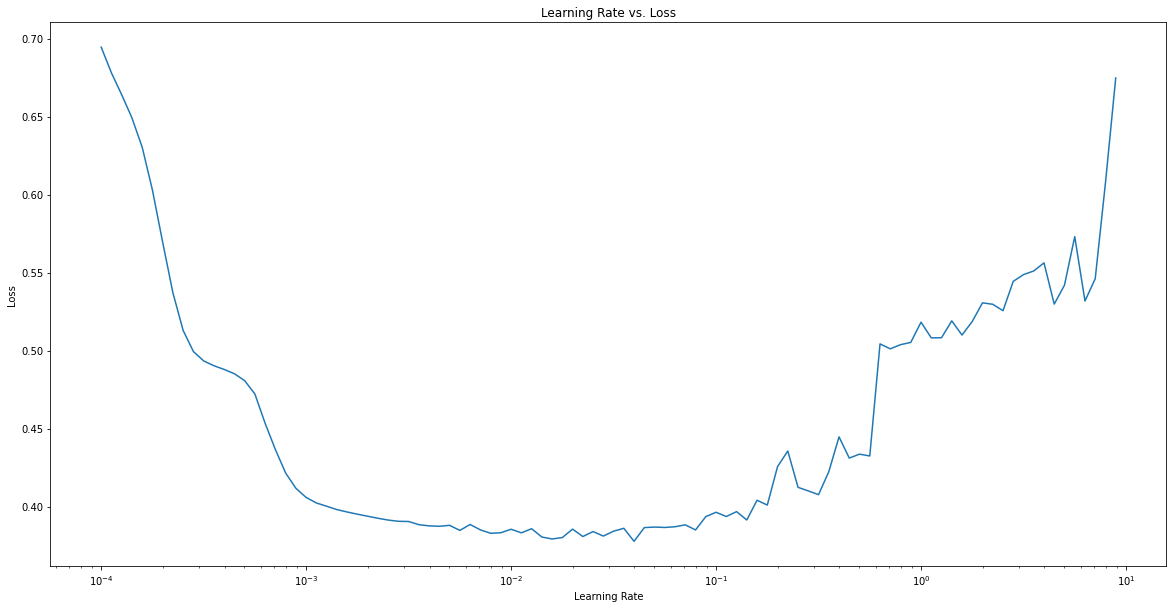

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

$ 10^{-3} $ or 0.001 is around the best learning rate

To find the learning rate to begin training take the learning rate where loss is decreasing but hasn't flattened out. 

This is a log scale so the next dot is .02, .03, ...

## Evaluate with Test Data

In [ ]:
loss, acc = model_1.evaluate(X_test_normal, y_test)
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set) : {acc}")

41/41 [==============================] - 0s 7ms/step - loss: 0.4086 - accuracy: 0.8097
Model Loss (Test Set) : 0.40856754779815674
Model Accuracy (Test Set) : 0.8097447752952576


## Understanding the Model

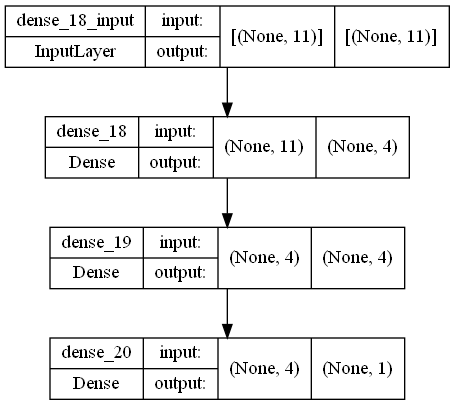

In [ ]:
# Each hidden layer tries to find patterns and then feeds 
# the results to the next layer
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)

In [ ]:
# Get Weight values & size
weights, biases = model_2.layers[1].get_weights()
weights, weights.shape

(array([[-0.92357695, -1.8599589 , -0.5405463 , -0.33853838],
        [-2.5003278 ,  0.05589265, -2.1297085 , -2.0484781 ],
        [-3.1383114 , -3.2839518 , -0.64899147, -1.2386305 ],
        [-0.06084743, -0.6045449 ,  0.48507988,  0.82604545]],
       dtype=float32),
 (4, 4))

For each of the 11 data points a 4 value tensor is created. This is referred to as the weight. It adjusts to find patterns in those 11 data points.

These 4 values start off as random weightings and adjust to decide how to best use these values to influence the neurla networks decisions (Guesses). Our neural network updates weights and biases as it improves its predictions.

Each of the 11 features is assigned a 4 value tensor.

In [ ]:
# Bias values & size
biases, biases.shape

(array([-2.596155 , -0.623707 , -1.7804542, -2.7812173], dtype=float32), (4,))

There is one bias vector for each hidden unit in our neural network. It is paired with the weight tensor. The bias tensor is responsible for defining how much the patterns in the weights tensor should influence the next layer.

## Multi-class Classification

When you have more than 2 classes it is called a multi-class classification. Build neural network to classify written numbers from 0 to 9. We'll use the Tensorflow MNIST handwritten digit database. 60,000 training examples and a test set of 10,000. 28x28 grayscale image associated with 10 classes. 

## Download Data and Split into Training & Test

In [ ]:
mnist = tf.keras.datasets.mnist 
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## View Image

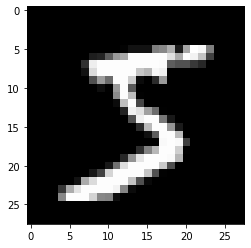

In [ ]:
plt.imshow(X_train[0], cmap="gray")
plt.show()

## Normalize the Features

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

## Show Unique values in Label Numpy Array

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Store Label Names

In [ ]:
label_names = np.unique(y_test)

| Hyperparameter | Multiclass Classification |
| :---: | :---: |
| Input Layer | Shape == number of features |
| Hidden Layers | Minimum of 1 to Unlimited |
| Neurons in Hidden Layer | Normally 10 to 100 |
| Output layer | 1 per Class |
| Hidden activation | Usually Rectified Linear Unit (ReLU) |
| Output activation | Softmax |
| Loss function | CategoricalCrossentropy |
| Optimizer | Stochastic Gradient Descent, Adam |

## Build Model

In [ ]:
# Set random seed
tf.random.set_seed(66)

# Create the model
# We have to flatten the 28x28 image
# Create a 4 value tensor for each of the 784 cells
# Optimize and create another 4 value tensor
# Output is 1 of the 10 possible labels
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Use SparseCategoricalCrossentropy if data isn't 
# normalized or one-hot encoded
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history = model_3.fit(X_train, 
                      y_train,
                      epochs=10,
                      validation_data=(X_test, y_test)) 

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 1.2819 - accuracy: 0.5605 - val_loss: 0.8054 - val_accuracy: 0.7323
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7314 - accuracy: 0.7563 - val_loss: 0.6761 - val_accuracy: 0.7763
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6551 - accuracy: 0.7826 - val_loss: 0.6293 - val_accuracy: 0.7924
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6188 - accuracy: 0.7971 - val_loss: 0.6011 - val_accuracy: 0.8064
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5958 - accuracy: 0.8137 - val_loss: 0.5843 - val_accuracy: 0.8229
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5712 - accuracy: 0.8283 - val_loss: 0.5629 - val_accuracy: 0.8380
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5501 - accuracy: 0.8384 - val_loss: 0.5454 - val_accuracy

## Find Ideal learning Rate

In [ ]:
# The ideal learning rate is where the loss decreases the most
# Set random seed
tf.random.set_seed(66)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Learning rate callback
scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_lr = model_4.fit(X_train, 
                              y_train,
                              epochs=40,
                              validation_data=(X_test, y_test),
                              callbacks=[scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2819 - accuracy: 0.5605 - val_loss: 0.8054 - val_accuracy: 0.7323 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7270 - accuracy: 0.7580 - val_loss: 0.6705 - val_accuracy: 0.7764 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6473 - accuracy: 0.7851 - val_loss: 0.6213 - val_accuracy: 0.7949 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6101 - accuracy: 0.8041 - val_loss: 0.5868 - val_accuracy: 0.8230 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5771 - accuracy: 0.8267 - val_loss: 0.5558 - val_accuracy: 0.8356 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5490 - accuracy: 0.8367 - val_loss: 0.5446 - val_accuracy: 0.8402 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 8s

## Plot to Find Ideal Learning rate

Text(0.5, 1.0, 'Learning Rate vs. Loss')

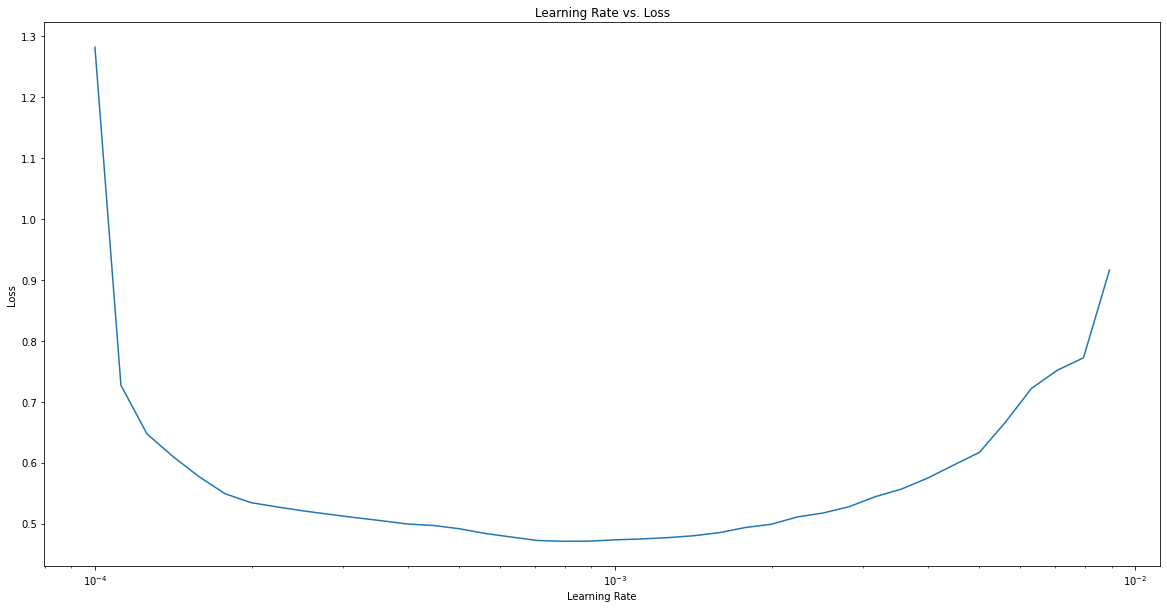

In [ ]:
lrs = 1e-4 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(20, 10))
plt.semilogx(lrs, history_lr.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

$ 10^{-3} $ or 0.001 is around the best learning rate

## Make Predictions with Model

In [ ]:
# Prediction Probabilities
y_prob = model_4.predict(X_test) 
y_prob[0]

array([1.6335019e-19, 1.5874131e-09, 9.3062638e-08, 3.1929246e-09,
       7.0527524e-02, 1.8261727e-11, 1.3014530e-18, 9.2456114e-01,
       6.1137167e-12, 4.9111922e-03], dtype=float32)

In [ ]:
# Get the actual label name our model predicted
label_names[tf.argmax(y_prob[0])]

7

In [ ]:
# Get the actual number from test label
y_test[0]

7